In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Union

In [2]:
class Config:
    train_path = "../input/train_v2.csv"
    test_path = "../input/test_v2.csv"
    sample_submission_path = "../input/sample_submission.csv"
    output_path = "../submission/"
    seed = 42
    n_splits = 4

In [3]:
df_train = pd.read_csv(Config.train_path)
df_test = pd.read_csv(Config.test_path)

In [4]:
df_train.head()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
0,2017020101,0.0,0.0,0.0,-1.0,4.1,2.9,16,1,2,2.7,2.5,1.3,0.0,8.0,0.0
1,2017020102,0.0,0.0,0.0,-1.1,4.2,2.6,1,1,1,3.3,1.5,0.9,0.0,24.0,4.0
2,2017020103,0.0,0.0,0.0,-0.7,4.2,2.4,1,15,16,4.0,1.7,0.6,4.0,32.0,12.0
3,2017020104,0.0,0.0,0.0,-1.1,4.4,1.8,1,15,1,4.1,3.1,1.4,0.0,12.0,0.0
4,2017020105,0.0,0.0,0.0,-1.2,4.1,1.5,2,14,14,3.7,3.4,0.9,0.0,32.0,4.0


In [5]:
df_train_2017 = df_train[df_train["datetime"].astype(str).apply(lambda x: x[:4] == "2017")].reset_index(drop=True)
df_train_2017.tail()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
3595,2017063020,0.0,0.0,0.0,24.8,24.2,23.0,9,10,7,3.8,5.5,0.9,0.0,0.0,0.0
3596,2017063021,0.0,0.0,0.0,24.5,24.0,23.2,9,10,9,2.5,5.5,0.7,0.0,0.0,0.0
3597,2017063022,0.0,0.0,0.0,24.4,24.3,23.1,9,10,10,2.0,5.5,0.5,0.0,0.0,0.0
3598,2017063023,0.0,0.0,0.0,24.0,24.2,22.7,9,10,13,2.4,5.4,0.3,0.0,0.0,0.0
3599,2017063024,0.0,0.0,0.0,23.9,24.3,22.4,9,10,1,1.0,4.3,0.5,0.0,0.0,0.0


In [6]:
df_train_2018 = df_train[df_train["datetime"].astype(str).apply(lambda x: x[:4] == "2018")].reset_index(drop=True)
df_train_2018.tail()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
3595,2018063020,0.0,0.0,0.0,28.0,28.6,27.5,6,9,8,3.2,6.1,5.0,0.0,0.0,0.0
3596,2018063021,0.0,0.0,0.0,27.5,27.8,26.9,6,8,8,2.9,5.6,4.4,0.0,0.0,0.0
3597,2018063022,0.0,0.0,0.0,26.9,27.4,26.4,7,8,8,2.6,4.9,2.5,0.0,0.0,0.0
3598,2018063023,0.0,0.0,0.0,26.2,27.3,26.5,8,9,8,2.4,6.3,3.1,0.0,0.0,0.0
3599,2018063024,0.0,0.0,0.0,25.8,27.3,25.8,8,9,9,2.1,6.3,3.3,0.0,0.0,0.0


In [7]:
df_train_2019 = df_train[df_train["datetime"].astype(str).apply(lambda x: x[:4] == "2019")].reset_index(drop=True)
df_train_2019.tail()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
3595,2019063020,0.0,0.0,0.0,22.6,25.1,22.7,7,11,16,1.3,4.4,0.6,0.0,0.0,0.0
3596,2019063021,0.0,0.0,0.0,22.2,25.2,22.7,8,10,2,1.2,6.2,1.1,0.0,0.0,0.0
3597,2019063022,0.0,0.0,0.0,22.5,24.7,22.4,4,12,16,0.6,3.1,0.7,0.0,0.0,0.0
3598,2019063023,0.0,0.0,0.0,22.1,23.0,22.2,5,1,15,3.0,2.5,0.5,0.0,0.0,0.0
3599,2019063024,0.0,0.0,0.0,21.9,22.8,21.9,7,1,0,2.4,2.0,0.2,0.0,0.0,0.0


In [8]:
df_train_2020 = df_train[df_train["datetime"].astype(str).apply(lambda x: x[:4] == "2020")].reset_index(drop=True)
df_train_2020.tail()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
1435,2020033120,0.0,0.0,0,10.0,11.5,9.4,16,2,16,2.4,2.6,0.7,8.0,8.0,4.0
1436,2020033121,0.0,0.0,0,10.1,11.3,8.9,15,15,14,2.4,1.7,1.3,8.0,4.0,4.0
1437,2020033122,0.0,0.0,0,9.8,11.3,8.8,3,15,15,1.2,2.7,0.9,0.0,4.0,0.0
1438,2020033123,0.5,0.0,0,9.7,10.9,8.9,16,16,1,0.5,2.9,0.6,0.0,0.0,0.0
1439,2020033124,0.0,0.0,0,9.7,10.7,8.9,16,1,16,1.0,2.7,0.4,0.0,8.0,0.0


In [9]:
def get_accum_pollen_temp(df: pd.DataFrame, target_pref: str, only_temp=False) -> pd.DataFrame:
    df_tmp = df.copy()    
    df_tmp["datetime"] = df_tmp["datetime"].apply(lambda x: str(x)[4: 8])
    df_tmp[f"temperature_{target_pref}"] = df_tmp[f"temperature_{target_pref}"].replace("欠測", 0).astype(np.float)
    df_tmp[f"pollen_{target_pref}"] = df_tmp[f"pollen_{target_pref}"].replace("欠測", 0).astype(np.float)
        
    df_tempera_mean = df_tmp[["datetime", f"temperature_{target_pref}"]].groupby("datetime").mean().reset_index()
    df_pollen_sum = df_tmp[["datetime", f"pollen_{target_pref}"]].groupby("datetime").sum().reset_index()

    #print(df_tempera_mean)
    #print(df_pollen_sum)
    df_daily_agg = df_tempera_mean.merge(df_pollen_sum, on="datetime")

    #print(df_daily_agg)
    
    df_daily_agg["sekisan_ondo"] = df_daily_agg[f"temperature_{target_pref}"].cumsum()
    df_daily_agg.loc[df_daily_agg[f"temperature_{target_pref}"] <0, f"temperature_{target_pref}"] = 0
    
    df_daily_agg.loc[df_daily_agg[f"pollen_{target_pref}"] <0, f"pollen_{target_pref}"] = 0
    df_daily_agg["sekisan_pollen"] = df_daily_agg[f"pollen_{target_pref}"].cumsum()        

    if only_temp:
        return df_daily_agg
    
    df_daily_agg["relative_sekisan_pollen"] = df_daily_agg["sekisan_pollen"] * (100 / df_daily_agg["sekisan_pollen"].max())

    return df_daily_agg



In [10]:
from scipy.optimize import leastsq

def target_func(prm, x, y):
    a, b = prm[0], prm[1]
    return y - (100 * np.exp(a * np.exp(b * x)))

def func(prm, x):
    a, b = prm[0], prm[1]
    return 100 * (np.exp(a * np.exp(b * x)))

In [11]:
def get_total_pollen_2020(
    dfs: List[pd.DataFrame], target_df: pd.DataFrame
) -> Tuple[float, float, float, pd.DataFrame]:
    
    df_accum_2017, df_accum_2018, df_accum_2019 = dfs
    df_accum_2020 = target_df

    x = (
        df_accum_2017["sekisan_ondo"].tolist()
        + df_accum_2018["sekisan_ondo"].tolist()
        + df_accum_2019["sekisan_ondo"].tolist()
    )
    y = (
        df_accum_2017["relative_sekisan_pollen"].tolist()
        + df_accum_2018["relative_sekisan_pollen"].tolist()
        + df_accum_2019["relative_sekisan_pollen"].tolist()
    )

    x = np.array(x)
    y = np.array(y)

    result = leastsq(target_func, (0, 0), args=(x, y))
    (a, b), _ = result

    df_accum_2020["relative_sekisan_pollen_pred"] = df_accum_2020["sekisan_ondo"].apply(
        lambda x: func((a, b), x)
    )

    total_pollen = df_accum_2020.iloc[-1].sekisan_pollen * (
        100 / df_accum_2020.iloc[-1].relative_sekisan_pollen_pred
    )

    return total_pollen, a, b, df_accum_2020


## utsunomiya

In [12]:
df_accum_2017 = get_accum_pollen_temp(df_train_2017, "utsunomiya")
df_accum_2018 = get_accum_pollen_temp(df_train_2018, "utsunomiya")
df_accum_2019 = get_accum_pollen_temp(df_train_2019, "utsunomiya")
df_accum_2020 = get_accum_pollen_temp(df_train_2020, "utsunomiya", only_temp=True)


<AxesSubplot:xlabel='sekisan_ondo', ylabel='relative_sekisan_pollen'>

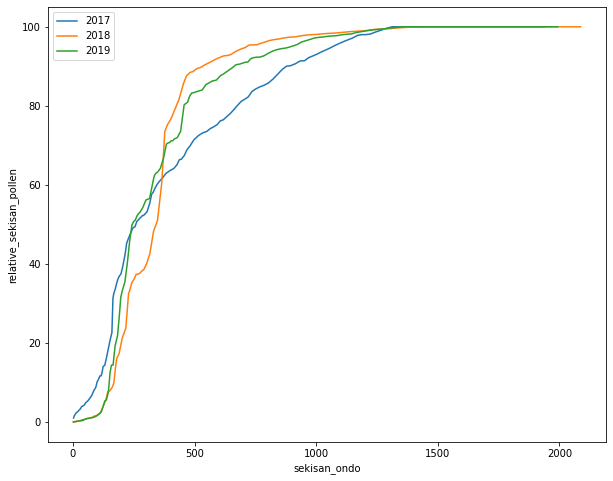

In [13]:
_, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df_accum_2017, x="sekisan_ondo", y="relative_sekisan_pollen", label="2017")
sns.lineplot(data=df_accum_2018, x="sekisan_ondo", y="relative_sekisan_pollen", label="2018")
sns.lineplot(data=df_accum_2019, x="sekisan_ondo", y="relative_sekisan_pollen", label="2019")

In [14]:
df_accum_2020.head()

,datetime,temperature_utsunomiya,pollen_utsunomiya,sekisan_ondo,sekisan_pollen
0,0201,4.437500,72.0,4.437500,72.0
1,0202,4.687500,76.0,9.125000,148.0
2,0203,6.879167,224.0,16.004167,372.0
3,0204,5.495833,124.0,21.500000,496.0
4,0205,4.887500,161.0,26.387500,657.0


In [15]:
(total_pollen_ut, a_ut, b_ut, df_accum_2020_ut) = get_total_pollen_2020(
    [df_accum_2017, df_accum_2018, df_accum_2019], df_accum_2020
)


In [16]:
print("2020総花粉飛散量", total_pollen_ut)

2020総花粉飛散量 47848.946232729206


In [17]:
a_ut, b_ut

(-4.33669043672912, -0.006111092345342258)

In [18]:
df_accum_2020_ut.tail()

,datetime,temperature_utsunomiya,pollen_utsunomiya,sekisan_ondo,sekisan_pollen,relative_sekisan_pollen_pred
55,0327,13.891667,2091.0,420.625000,34538.0,71.766508
56,0328,13.787500,708.0,434.412500,35246.0,73.716382
57,0329,2.183333,0.0,436.595833,35246.0,74.014926
58,0330,6.441667,988.0,443.037500,36234.0,74.879631
59,0331,8.375000,116.0,451.412500,36350.0,75.968235


In [19]:
df_accum_2020_test = get_accum_pollen_temp(pd.concat([df_train_2020, df_test]).reset_index(drop=True), "utsunomiya", only_temp=True)
df_accum_2020_test["relative_sekisan_pollen_pred"] = df_accum_2020_test["sekisan_ondo"].apply(lambda x: func((a_ut, b_ut), x))
target_term_percent = df_accum_2020_test[df_accum_2020_test.datetime == "0414"].relative_sekisan_pollen_pred.values - df_accum_2020_test[df_accum_2020_test.datetime == "0331"].relative_sekisan_pollen_pred.values
print("評価期間の花粉の割合", target_term_percent[0])

評価期間の花粉の割合 13.401466765933876


In [20]:
df_accum_2020_test.tail()

,datetime,temperature_utsunomiya,pollen_utsunomiya,sekisan_ondo,sekisan_pollen,relative_sekisan_pollen_pred
69,0410,8.845833,0.0,561.112500,36350.0,86.884441
70,0411,8.841667,0.0,569.954167,36350.0,87.529323
71,0412,9.429167,0.0,579.383333,36350.0,88.184571
72,0413,7.870833,0.0,587.254167,36350.0,88.706822
73,0414,10.495833,0.0,597.750000,36350.0,89.369702


## tokyo


In [21]:
df_accum_2017 = get_accum_pollen_temp(df_train_2017, "tokyo")
df_accum_2018 = get_accum_pollen_temp(df_train_2018, "tokyo")
df_accum_2019 = get_accum_pollen_temp(df_train_2019, "tokyo")
df_accum_2020 = get_accum_pollen_temp(df_train_2020, "tokyo", only_temp=True)

<AxesSubplot:xlabel='sekisan_ondo', ylabel='relative_sekisan_pollen'>

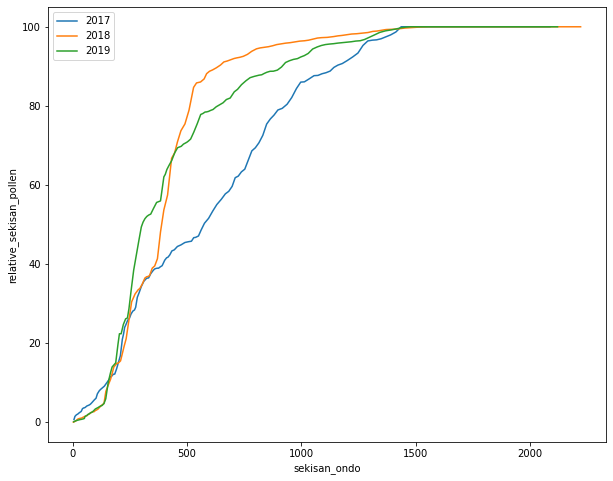

In [22]:
_, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df_accum_2017, x="sekisan_ondo", y="relative_sekisan_pollen", label="2017")
sns.lineplot(data=df_accum_2018, x="sekisan_ondo", y="relative_sekisan_pollen", label="2018")
sns.lineplot(data=df_accum_2019, x="sekisan_ondo", y="relative_sekisan_pollen", label="2019")

In [23]:
(total_pollen_tk, a_tk, b_tk, df_accum_2020_tk) = get_total_pollen_2020(
    [df_accum_2017, df_accum_2018, df_accum_2019], df_accum_2020
)

In [24]:
print("2020総花粉飛散量", total_pollen_tk)

2020総花粉飛散量 28232.168622513003


In [25]:
a_tk, b_tk

(-3.8901679770788196, -0.004241544513363027)

In [26]:
df_accum_2020_tk.tail()

,datetime,temperature_tokyo,pollen_tokyo,sekisan_ondo,sekisan_pollen,relative_sekisan_pollen_pred
55,0327,15.466667,342.0,485.695833,17910.0,60.910322
56,0328,15.591667,219.0,501.287500,18129.0,62.873735
57,0329,2.895833,0.0,504.183333,18129.0,63.230917
58,0330,6.291667,112.0,510.475000,18241.0,63.998780
59,0331,8.766667,124.0,519.241667,18365.0,65.049909


In [27]:
df_accum_2020_test = get_accum_pollen_temp(pd.concat([df_train_2020, df_test]).reset_index(drop=True), "tokyo", only_temp=True)
df_accum_2020_test["relative_sekisan_pollen_pred"] = df_accum_2020_test["sekisan_ondo"].apply(lambda x: func((a_tk, b_tk), x))
target_term_percent = df_accum_2020_test[df_accum_2020_test.datetime == "0414"].relative_sekisan_pollen_pred.values - df_accum_2020_test[df_accum_2020_test.datetime == "0331"].relative_sekisan_pollen_pred.values
print("評価期間の花粉の割合", target_term_percent[0])

評価期間の花粉の割合 15.31909333922222


## chiba

In [28]:
df_accum_2017 = get_accum_pollen_temp(df_train_2017, "chiba")
df_accum_2018 = get_accum_pollen_temp(df_train_2018, "chiba")
df_accum_2019 = get_accum_pollen_temp(df_train_2019, "chiba")
df_accum_2020 = get_accum_pollen_temp(df_train_2020, "chiba", only_temp=True)


<AxesSubplot:xlabel='sekisan_ondo', ylabel='relative_sekisan_pollen'>

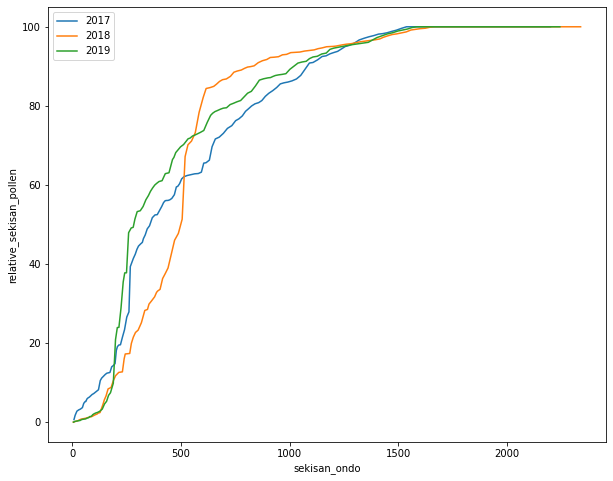

In [29]:
_, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df_accum_2017, x="sekisan_ondo", y="relative_sekisan_pollen", label="2017")
sns.lineplot(data=df_accum_2018, x="sekisan_ondo", y="relative_sekisan_pollen", label="2018")
sns.lineplot(data=df_accum_2019, x="sekisan_ondo", y="relative_sekisan_pollen", label="2019")

In [30]:
(total_pollen_cb, a_cb, b_cb, df_accum_2020_cb) = get_total_pollen_2020(
    [df_accum_2017, df_accum_2018, df_accum_2019], df_accum_2020
)

In [31]:
print("2020総花粉飛散量", total_pollen_cb)

2020総花粉飛散量 32978.780406463025


In [32]:
a_cb, b_cb

(-3.797493753848663, -0.004131774130024546)

In [33]:
df_accum_2020_cb.tail()

,datetime,temperature_chiba,pollen_chiba,sekisan_ondo,sekisan_pollen,relative_sekisan_pollen_pred
55,0327,16.354167,396.0,564.737500,23367.0,69.195265
56,0328,15.720833,156.0,580.458333,23523.0,70.816429
57,0329,4.725000,0.0,585.183333,23523.0,71.290461
58,0330,8.175000,301.0,593.358333,23824.0,72.096257
59,0331,10.787500,294.0,604.145833,24118.0,73.131874


In [34]:
df_accum_2020_test = get_accum_pollen_temp(pd.concat([df_train_2020, df_test]).reset_index(drop=True), "chiba", only_temp=True)
df_accum_2020_test["relative_sekisan_pollen_pred"] = df_accum_2020_test["sekisan_ondo"].apply(lambda x: func((a_cb, b_cb), x))
target_term_percent = df_accum_2020_test[df_accum_2020_test.datetime == "0414"].relative_sekisan_pollen_pred.values - df_accum_2020_test[df_accum_2020_test.datetime == "0331"].relative_sekisan_pollen_pred.values
print("評価期間の花粉の割合", target_term_percent[0])

評価期間の花粉の割合 12.843262552256846


In [35]:
df_accum_2020_test[(df_accum_2020_test.datetime == "0331") | (df_accum_2020_test.datetime == "0414") ]

,datetime,temperature_chiba,pollen_chiba,sekisan_ondo,sekisan_pollen,relative_sekisan_pollen_pred
59,0331,10.7875,294.0,604.145833,24118.0,73.131874
73,0414,11.8125,0.0,780.312500,24118.0,85.975136


In [36]:
df_accum_2020_test.tail()

,datetime,temperature_chiba,pollen_chiba,sekisan_ondo,sekisan_pollen,relative_sekisan_pollen_pred
69,0410,11.454167,0.0,736.687500,24118.0,83.446961
70,0411,11.370833,0.0,748.058333,24118.0,84.142885
71,0412,11.129167,0.0,759.187500,24118.0,84.798324
72,0413,9.312500,0.0,768.500000,24118.0,85.327768
73,0414,11.812500,0.0,780.312500,24118.0,85.975136


## tryal

In [37]:
x = (
    df_accum_2017["sekisan_ondo"].tolist()
    + df_accum_2018["sekisan_ondo"].tolist()
    + df_accum_2019["sekisan_ondo"].tolist()
)
y = (
    df_accum_2017["relative_sekisan_pollen"].tolist()
    + df_accum_2018["relative_sekisan_pollen"].tolist()
    + df_accum_2019["relative_sekisan_pollen"].tolist()
)

x = np.array(x)
y = np.array(y)

In [38]:
result = leastsq(target_func, (0, 0), args=(x, y))
(a, b), _ = result


In [39]:
func((a, b), 0)


2.242690883419083

In [40]:
df_accum_2017["relative_sekisan_pollen_pred"] = df_accum_2017["sekisan_ondo"].apply(lambda x: func((a, b), x))

<AxesSubplot:xlabel='sekisan_ondo', ylabel='relative_sekisan_pollen'>

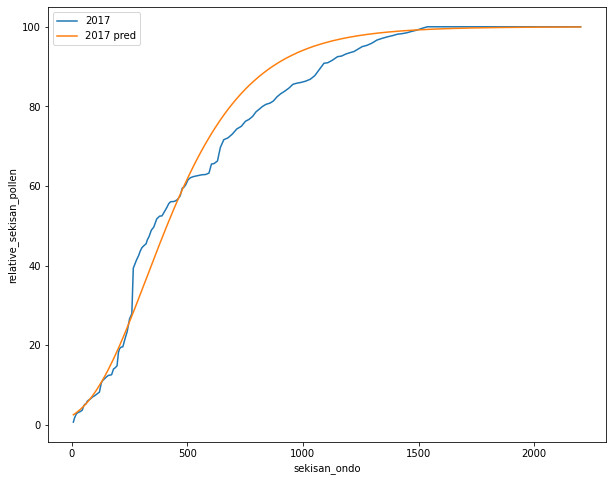

In [41]:
_, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df_accum_2017, x="sekisan_ondo", y="relative_sekisan_pollen", label="2017")
#sns.lineplot(data=df_accum_2018, x="sekisan_ondo", y="relative_sekisan_pollen", label="2018")
#sns.lineplot(data=df_accum_2019, x="sekisan_ondo", y="relative_sekisan_pollen", label="2019")
sns.lineplot(data=df_accum_2017, x="sekisan_ondo", y="relative_sekisan_pollen_pred", label="2017 pred")

In [42]:
df_accum_2020["relative_sekisan_pollen_pred"] = df_accum_2020["sekisan_ondo"].apply(lambda x: func((a, b), x))
df_accum_2018["relative_sekisan_pollen_pred"] = df_accum_2018["sekisan_ondo"].apply(lambda x: func((a, b), x))

In [43]:
df_accum_2020.tail()

,datetime,temperature_chiba,pollen_chiba,sekisan_ondo,sekisan_pollen,relative_sekisan_pollen_pred
55,0327,16.354167,396.0,564.737500,23367.0,69.195265
56,0328,15.720833,156.0,580.458333,23523.0,70.816429
57,0329,4.725000,0.0,585.183333,23523.0,71.290461
58,0330,8.175000,301.0,593.358333,23824.0,72.096257
59,0331,10.787500,294.0,604.145833,24118.0,73.131874


In [44]:
df_accum_2020.iloc[-1].sekisan_pollen * (100 / df_accum_2020.iloc[-1].relative_sekisan_pollen_pred)

32978.780406463025

In [45]:
df_accum_2018.iloc[[58, -1]]

,datetime,temperature_chiba,pollen_chiba,sekisan_ondo,sekisan_pollen,relative_sekisan_pollen,relative_sekisan_pollen_pred
58,0331,13.054167,3883.0,531.679167,91518.0,70.1497,65.564740
149,0630,28.587500,0.0,2340.000000,130461.0,100.0000,99.975982


In [46]:
i = 58
df_accum_2018.iloc[i].sekisan_pollen * (100 / df_accum_2018.iloc[i].relative_sekisan_pollen_pred)

139584.17185032804

<AxesSubplot:xlabel='sekisan_ondo', ylabel='relative_sekisan_pollen_pred'>

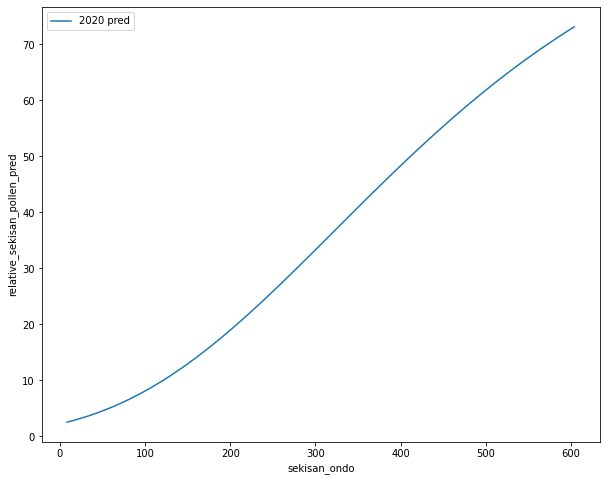

In [47]:
_, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df_accum_2020, x="sekisan_ondo", y="relative_sekisan_pollen_pred", label="2020 pred")
